In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling load_data() on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# 이미지 프린트하기

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index 42. That's a different boot than the one at index 0.

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0  83 152  57  84 166 113  31   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0   0 174 210 227 252 226 231 249 225 220 234  82   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 177 242 213 211 212 219 215 207 211 212 223 230  43   0   5   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 195 220 214 215 217 215 215 216 215 214 205 229 130   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 208 222 215 213 215 216 217 216 214 212 214 226 169   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  30 222 227 236 213 215 217 218 217 218 211 225 226 183   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  67 243 185 144 250 215 218 219 220 228 207 140 231 203   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 104 248 148  75 254 212 219 220 222 228 216  53 229 219  21   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 144 249 148  55 255 

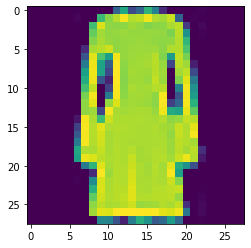

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 훈련용 이미지 개수가 6만개이므로 0-59999까지 확인해 볼 수 있음
index = 49

# 프린트할 때 한 줄에 출력되는 캐릭터 개수 설정
np.set_printoptions(linewidth=320)

# 라벨, 이미지 출력
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

# Normalization

All of the values in the number are between 0 and 255, but it's good to rescale all values to between 0 and 1. It's process normalization

In [ ]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

# Model design

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network.</br>
Flatten: Flatten just turns 28x28 pixels into a 1-dimensional array.<br/>
Dense: Adds a layer of neurons
(각각의 뉴런은 활성화 함수 필요함) 

ReLU

```
if x > 0:
 return x
else:
 return 0
```
ReLU only passes values 0 or greater to the next layer in the network. </br>
(0 이상인 값은 그대로 출력, 0 이하는 0으로 출력)



### Softmax
Softmax takes a list of values and scales these so the sum of all elements will be equal to 1.
예를 들어, output dense layer에 10개의 퍼셉트론이 있을 때, index=4의 값이 가장 크다는 것은 모델이 coat라고 예측할 확률이 가장 높다는 것을 의미함.

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'Input to softmax fnction: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of the softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
# 모든 확률의 합은 1
sum = tf.reduce_sum(outputs)
print(f'sum of the outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs) # 가장 큰 값의 인덱스 반환
print(f'class with highest probability: {prediction}')

Input to softmax fnction: [[1. 3. 4. 2.]]
output of the softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of the outputs: 1.0
class with highest probability: 2


# Compiling with optimizer and loss function

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# model.fit()으로 train하기, training data에 training labels 붙여줌
model.fit(training_images, training_labels, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5019 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8913


# Accuracy
test accuracy: 0.8739
it means 87% accurate on the entire test data set. 

In [ ]:
# Evaluate the model on unseen data
# 테스트 데이터로 검증하기
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8739


[0.3423924744129181, 0.8738999962806702]

## Exercise 1

list is the probability that this item is each of the 10 classes. </br>
These numbers are a probability that the value being classified is the corresponding value

In [ ]:
classifications = model.predict(test_images)

print(classifications[3])

[1.8107307e-06 9.9997211e-01 1.1733305e-07 2.5687725e-05 1.5345528e-07 8.6884937e-11 1.8902917e-07 2.7528981e-11 1.0942761e-10 4.4083917e-11]


In [ ]:
print(test_labels[3])
# 9.9997211e-01

1


# Exercise 2

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1849
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0751
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0479
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0348
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0714
[2.9479078e-10 1.5649539e-09 3.8117358e-09 1.4769955e-06 4.6475542e-11 2.5877026e-10 3.3843802e-13 9.9999642e-01 1.1574428e-09 2.1995040e-06]
7


# We increase to 1024 neurons
Training takes longer, but is more accurate.</br>
Because by adding more neurons we have to do more calculations, slowing down the process, <br>but they have a good impact 👉 we do get more accurate.

# What would happen if you remove the Flatten() layer?
I will get an error about the shape of the data.<br>
It reinforces the rule of thumb that the first layer in the network should be the same shape as your data.<br>
The data is 28x28 images, and 28 layers of 28 neurons would be infeasible,.. <br>
so it makes sense to flatten that 28x28 into a 784x1.

### Error message: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

# Exercise 4
Consider the final layers, why are there 10 of them?
만약 마지막 레이어의 뉴런 개수가 10개보다 많다면?

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(15, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1885
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0738
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0476
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0343
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0634
[4.1836596e-09 9.0397814e-09 2.1491071e-07 1.8119828e-04 1.3515736e-12 6.6755773e-10 2.2019491e-12 9.9981731e-01 1.1939342e-08 1.3168908e-06 2.1430661e-12 1.8077121e-12 3.1107946e-12 1.2033073e-12 4.4590338e-12]
7


I get an error because it finds an unexpected value.
<br>Another rule of thumb - the number of neurons in the last layer should match the number of classes you are classifying for.

# Exercise 5
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2245
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0954
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0809
[9.08641551e-10 2.31331665e-08 1.09186935e-07 7.17206383e-09 3.24183458e-09 3.11157056e-09 1.76035174e-12 9.99998450e-01 1.19077290e-08 1.46826449e-06]
7


## Answer:
There isn't a signimicant impact.
Because this is simple data.
But, for far more complex data (including color images) extra layers are often necessary.

# Exercise 6
Consider the impact of training for more or less epochs. What would be the best case?
- Try 15 epochs 👉 You'll probably get a model with a much better loss than one with 5. (성능 개선됨)
- Try 30 epochs 👉 You might see loss value stop decreasing, and sometimes increases. (오버피팅 발생)

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0762
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0224
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0194
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148
Epoch 11/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0135
Epoch 12/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0097
E

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1139
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0456
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0357
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0306
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0194
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156
Epoch 11/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0131
Epoch 12/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121
E

# Exercise 7
Before you trained, 0-255를 0-1로 normalize하는 과정 없애면 어떻게 될까?

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images = training_images / 255.0 # 이거 제거해보기

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4163
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2925
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2344
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2178
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2030
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2025
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1934
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1877
Epoch 11/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1784
Epoch 12/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1843
E

# Exercise 8

- 원하는 정확도 도달하면 훈련 끝내보기
- tf.keras.callbacks의 Callback 객체 이용

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.98):
      print("\n Reached 98% accuracy so canceling training ")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks]) 

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2065 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 3/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9834
 Reached 50% accuracy so canceling training 
313/313 [==============================] - 10s 3ms/step - loss: 0.0746 - accuracy: 0.9766
[1.1570433e-12 8.5984180e-09 6.5135612e-07 4.9845689e-06 2.9529348e-12 3.6978593e-12 1.0729857e-13 9.9999428e-01 7.2893037e-08 4.2426245e-09]
7
